# 1. Install Dependencies and Setup

In [15]:
!pip install tensorflow opencv-python matplotlib

In [16]:
!pip list #to make sure we have tensorflow libraries

Package                      Version
---------------------------- -----------
absl-py                      2.1.0
astunparse                   1.6.3
cachetools                   5.5.0
certifi                      2024.8.30
charset-normalizer           3.3.2
contourpy                    1.1.1
cycler                       0.12.1
flatbuffers                  24.3.25
fonttools                    4.53.1
gast                         0.4.0
google-auth                  2.34.0
google-auth-oauthlib         1.0.0
google-pasta                 0.2.0
grpcio                       1.66.1
h5py                         3.11.0
idna                         3.8
importlib_metadata           8.4.0
importlib_resources          6.4.4
keras                        2.13.1
kiwisolver                   1.4.6
libclang                     18.1.1
Markdown                     3.7
MarkupSafe                   2.1.5
matplotlib                   3.7.5
numpy                        1.24.3
oauthlib                     3.2.2
op

In [17]:
!pip install tensorflow

In [18]:
import tensorflow as tf
import os

In [19]:
os.listdir('data') #check all class in data folder

['Anadyomene plicata',
 'Boodlea composita',
 'Caulerpa racemosa',
 'Chlorodismis fastigiata',
 'Halemida opuntia',
 'Ulva lactuca',
 'Ulva reticulata']

In [20]:
gpus = tf.config.experimental.list_physical_devices('CPU')

In [21]:
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [22]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

# 2. Remove dodgy images

In [23]:
!pip install pillow

In [24]:
import cv2
import imghdr
from PIL import Image

C:\Users\User\AppData\Local\Temp\ipykernel_11872\3984671735.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [25]:
import cv2
import imghdr
from PIL import Image
from matplotlib import pyplot as plt

In [26]:
data_dir = 'data' 

In [27]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [28]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
    #print(image_class)
        print(image)

Anadyomene_plicata_00001.jpg
Anadyomene_plicata_00002.jpg
Anadyomene_plicata_00003.jpg
Anadyomene_plicata_00004.jpg
Anadyomene_plicata_00005.jpg
Anadyomene_plicata_00006.jpg
Anadyomene_plicata_00007.jpg
Anadyomene_plicata_00008.jpg
Anadyomene_plicata_00009.jpg
Anadyomene_plicata_00010.jpg
Anadyomene_plicata_00011.jpg
Anadyomene_plicata_00012.jpg
Anadyomene_plicata_00013.jpg
Anadyomene_plicata_00014.jpg
Anadyomene_plicata_00015.jpg
Anadyomene_plicata_00016.jpg
Anadyomene_plicata_00017.jpg
Anadyomene_plicata_00018.jpg
Anadyomene_plicata_00019.jpg
Anadyomene_plicata_00020.jpg
Anadyomene_plicata_00021.jpg
Anadyomene_plicata_00022.jpg
Anadyomene_plicata_00023.jpg
Anadyomene_plicata_00024.jpg
Anadyomene_plicata_00025.jpg
Anadyomene_plicata_00026.jpg
Anadyomene_plicata_00027.jpg
Anadyomene_plicata_00028.jpg
Anadyomene_plicata_00029.jpg
Anadyomene_plicata_00030.jpg
Anadyomene_plicata_00031.jpg
Anadyomene_plicata_00032.jpg
Anadyomene_plicata_00033.jpg
Anadyomene_plicata_00034.jpg
Anadyomene_pli

In [29]:
img = cv2.imread(os.path.join('data', 'Anadyomene plicata', 'Anadyomene_plicata_00001.jpg'))

In [30]:
img.shape

(2160, 2880, 3)

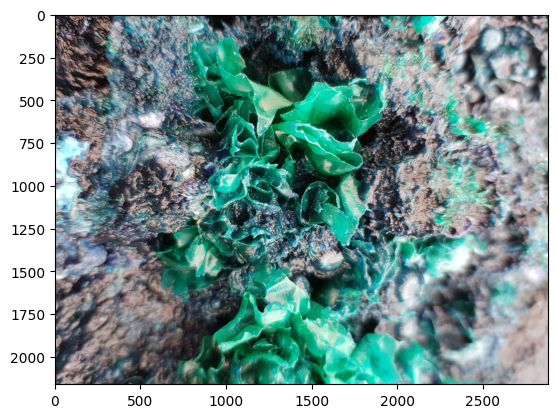

In [31]:
plt.imshow(img) #no color

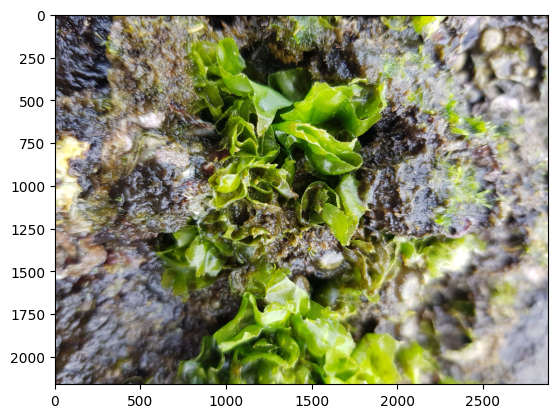

In [32]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) #with color

In [20]:
#removing unreadable images
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

KeyboardInterrupt: 

# 3. Load Data

In [33]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [34]:
import numpy as np
from matplotlib import pyplot as plt

In [35]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)
Source:   
@keras_export(
    [
        "keras.utils.image_dataset_from_directory",
        "keras.preprocessing.image_dataset_from_directory",
    ]
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    ve

In [36]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 6731 files belonging to 7 classes.


In [37]:
data_iterator = data.as_numpy_iterator()

In [38]:
batch = data_iterator.next()

In [39]:
len(batch) #it should output 2 means 1 is the images and the other 1 is the labels made by the script

2

In [40]:
batch[0].shape

(32, 256, 256, 3)

In [41]:
batch[0]

array([[[[132.75     , 146.75     ,  95.75     ],
         [132.07422  , 146.07422  ,  95.07422  ],
         [131.48828  , 146.73828  ,  97.73828  ],
         ...,
         [232.       , 236.       , 235.       ],
         [230.71875  , 234.71875  , 233.71875  ],
         [233.6289   , 235.6289   , 234.6289   ]],

        [[135.10547  , 148.10547  , 102.10547  ],
         [132.27734  , 146.27734  ,  97.27734  ],
         [137.39844  , 150.39844  , 105.64844  ],
         ...,
         [234.66406  , 236.66406  , 235.66406  ],
         [231.10156  , 233.10156  , 232.10156  ],
         [230.38672  , 232.38672  , 231.38672  ]],

        [[136.74219  , 148.09766  , 104.03125  ],
         [138.96094  , 150.96094  , 104.96094  ],
         [143.52344  , 154.52344  , 111.52344  ],
         ...,
         [233.97656  , 235.97656  , 234.97656  ],
         [234.0039   , 236.0039   , 235.0039   ],
         [233.42969  , 235.42969  , 234.42969  ]],

        ...,

        [[211.9375   , 212.9375   , 20

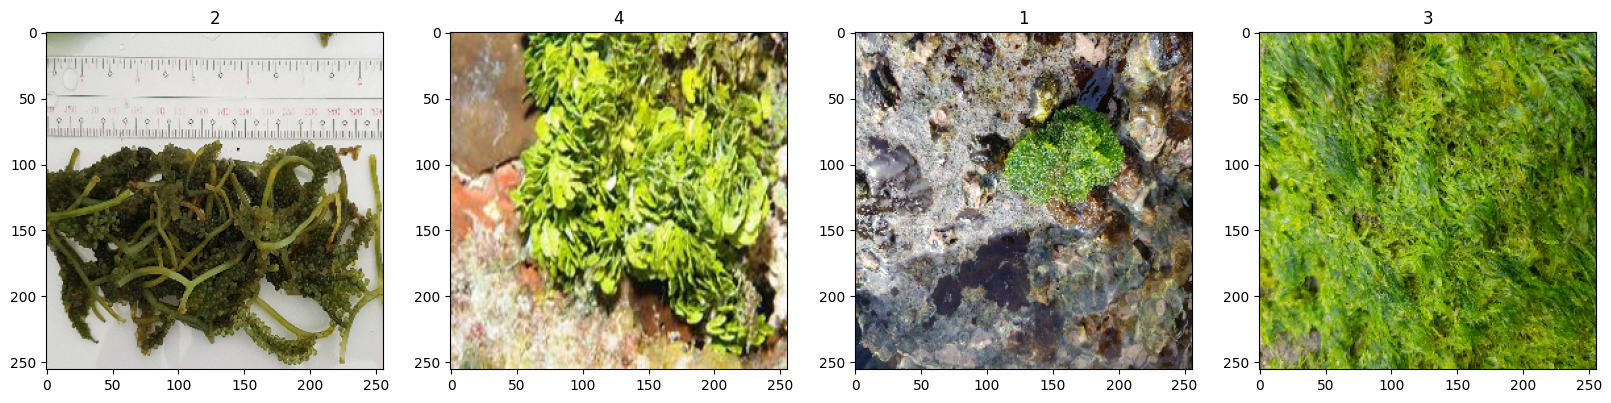

In [42]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
# 4. Scale Data

In [53]:
scaled = batch[0] / 255

In [54]:
scaled.max()

1.0

In [55]:
scaled.min()

0.0

In [56]:
batch[0].max()

255.0

In [57]:
data = data.map(lambda x,y: (x/255, y)) #x the images and y transformation

In [58]:
data.as_numpy_iterator().next()

(array([[[[6.27159953e-01, 7.06571698e-01, 1.82781860e-01],
          [5.93811274e-01, 6.97120070e-01, 2.02680767e-01],
          [8.54365826e-01, 9.38511014e-01, 5.76133549e-01],
          ...,
          [2.51930147e-01, 4.27987128e-01, 1.73912376e-01],
          [4.56632972e-01, 5.93887866e-01, 3.42907488e-01],
          [2.51424640e-01, 4.34620112e-01, 1.69699758e-01]],
 
         [[7.12086380e-01, 7.87576616e-01, 3.31204057e-01],
          [5.98054528e-01, 7.09696710e-01, 2.24999994e-01],
          [5.81050873e-01, 6.91084564e-01, 3.53354782e-01],
          ...,
          [2.57077217e-01, 4.29656863e-01, 1.42432600e-01],
          [4.58900124e-01, 6.14292264e-01, 2.85125613e-01],
          [4.30039823e-01, 6.03124976e-01, 2.53860295e-01]],
 
         [[7.40594387e-01, 8.06357205e-01, 3.72303933e-01],
          [5.40563703e-01, 6.37270212e-01, 1.60784319e-01],
          [6.38373137e-01, 7.47594953e-01, 3.42049628e-01],
          ...,
          [2.70603567e-01, 4.31985289e-01, 1.6118

In [59]:
data.as_numpy_iterator().next()[0].max()

1.0

In [60]:
data.as_numpy_iterator().next()[0].min()

0.0

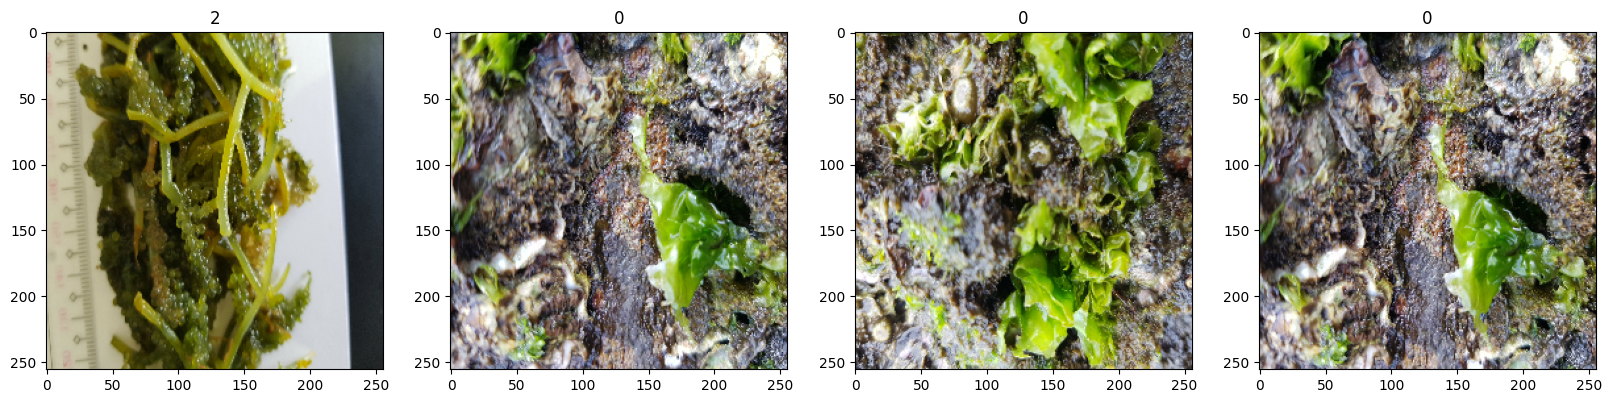

In [61]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 5. Split Data

In [62]:
len(data)

211

In [63]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [64]:
train_size

147

In [65]:
val_size

42

In [66]:
test_size

22

In [67]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [68]:
len(test)

22

In [69]:
for x, y in train.take(1):
    print(f'Labels: {y}')

Labels: [5 1 4 5 5 1 2 0 1 6 2 3 6 1 0 6 1 2 1 1 1 1 3 1 3 3 0 5 3 2 2 2]


# 6. Build Deep Learning Model and Train

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [47]:
logdir='logs'

In [48]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

# Define your number of classes (7 in your case)
num_classes = 7

# Build the model for multi-class classification
model = Sequential()
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Multi-class classification

# Compile the model with categorical crossentropy
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),  # Use SparseCategoricalCrossentropy for integer labels
              metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=2000, validation_data=val, callbacks=[tensorboard_callback])

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,698,167 (14.11 MB)

 Trainable params: 3,698,167 (14.11 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2000
147/147 ━━━━━━━━━━━━━━━━━━━━ 54s 355ms/step - accuracy: 0.6143 - loss: 1.2231 - val_accuracy: 0.9442 - val_loss: 0.2208
Epoch 2/2000
147/147 ━━━━━━━━━━━━━━━━━━━━ 52s 351ms/step - accuracy: 0.9585 - loss: 0.1685 - val_accuracy: 0.9554 - val_loss: 0.1621
Epoch 3/2000
147/147 ━━━━━━━━━━━━━━━━━━━━ 52s 356ms/step - accuracy: 0.9776 - loss: 0.0835 - val_accuracy: 0.9680 - val_loss: 0.1203
Epoch 4/2000
147/147 ━━━━━━━━━━━━━━━━━━━━ 52s 353ms/step - accuracy: 0.9850 - loss: 0.0558 - val_accuracy: 0.9777 - val_loss: 0.0920
Epoch 5/2000
147/147 ━━━━━━━━━━━━━━━━━━━━ 52s 353ms/step - accuracy: 0.9895 - loss: 0.0333 - val_accuracy: 0.9784 - val_loss: 0.0916
Epoch 6/2000
147/147 ━━━━━━━━━━━━━━━━━━━━ 58s 398ms/step - accuracy: 0.9956 - loss: 0.0220 - val_accuracy: 0.9576 - val_loss: 0.1527
Epoch 7/2000
147/147 ━━━━━━━━━━━━━━━━━━━━ 52s 352ms/step - accuracy: 0.9951 - loss: 0.0169 - val_accuracy: 0.9613 - val_loss: 0.1559
Epoch 8/2000
147/147 ━━━━━━━━━━━━━━━━━━━━ 51s 350ms/step - accuracy: 

In [44]:
# Print model summary to check input shape
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,698,169 (14.11 MB)

 Trainable params: 3,698,167 (14.11 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

# 7. Plot Performance

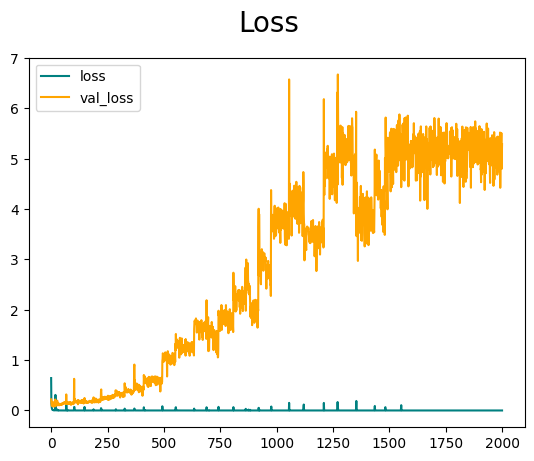

In [50]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

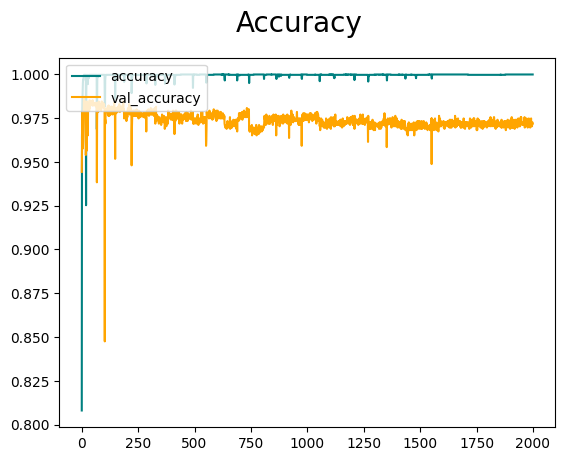

In [51]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 8. Evaluate

In [70]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

# Initialize metrics
precision = Precision()
recall = Recall()
accuracy = CategoricalAccuracy()

# Iterate through the test dataset
for batch in test.as_numpy_iterator():
    X, y = batch
    
    # Predict the probabilities
    yhat = model.predict(X)
    
    # Convert predictions to class labels (i.e., argmax)
    yhat_labels = np.argmax(yhat, axis=1)
    
    # Update metrics for each batch
    precision.update_state(y, yhat_labels)
    recall.update_state(y, yhat_labels)
    accuracy.update_state(y, yhat_labels)

# Print final metrics after all batches
print(f'Precision: {precision.result().numpy()}')
print(f'Recall: {recall.result().numpy()}')
print(f'Accuracy: {accuracy.result().numpy()}')


NameError: name 'model' is not defined

# 9. Test

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import os

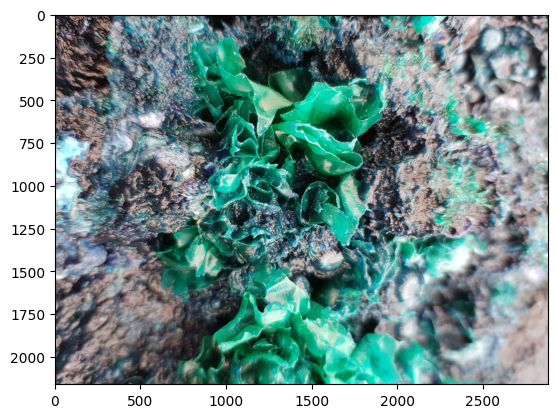

In [8]:
img = cv2.imread(r"C:\Users\User\OneDrive\Desktop\Anadyomene_plicata_00001.jpg")
plt.imshow(img)
plt.show()

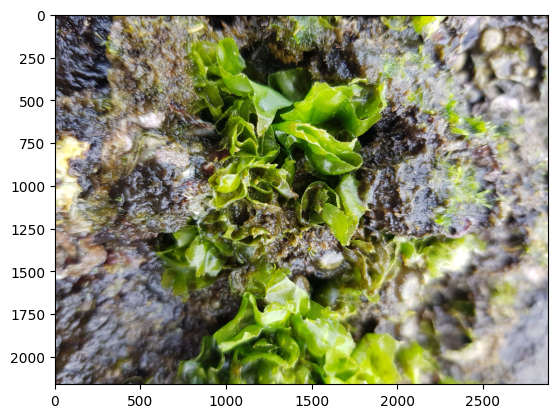

In [9]:
img = cv2.imread(r"C:\Users\User\OneDrive\Desktop\Anadyomene_plicata_00001.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

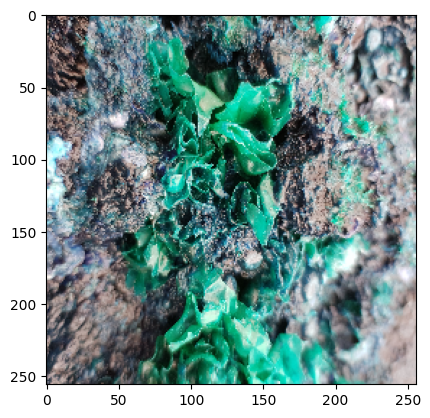

In [10]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [11]:
resize.shape

TensorShape([256, 256, 3])

In [12]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [43]:
yhat = model.predict(np.expand_dims(resize/255, 0))

NameError: name 'model' is not defined

In [60]:
yhat

array([[0.0000000e+00, 0.0000000e+00, 5.8710504e-25, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [14]:
# Assuming yhat is the output of a softmax layer, it will be an array of probabilities for each class
# Find the predicted class index
predicted_class = np.argmax(yhat)

# Get the confidence (probability) of the predicted class
confidence = yhat[0][predicted_class]

# Define your classes (replace with actual class names)
classes = ['Anadyomene_plicata', 'Boodlea_composita', 'Caulerpa_racemosa', 'Chlorodismis_fastigiata', 'Halimeda_opuntia', 'Ulva_lactuca', 'Ulva_reticulata']

# Compare the confidence with the threshold (0.75 in this case)
if confidence > 0.75:
    print(f'Predicted class is {classes[predicted_class]} with confidence {confidence:.2f}')
else:
    print('Prediction confidence is too low.')


NameError: name 'yhat' is not defined

# 10. Save the Model

In [62]:
from tensorflow.keras.models import load_model

In [63]:
model.save(os.path.join('models','imageclassifier.h5'))

In [64]:
new_model = load_model(os.path.join('models', 'imageclassifier.h5'))

In [65]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


array([[0.0000000e+00, 0.0000000e+00, 5.8710504e-25, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00]], dtype=float32)

# 11. testing through camera

In [1]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model(r"C:\Users\User\ImageClassification-main\models\imageclassifier.h5")  # Update with your model's path

# Define class names
class_names = ['Anadyomene plicata', 'Boodlea composita', 'Caulerpa racemosa',
               'Chlorodismis fastigiata', 'Halimeda opuntia', 'Ulva lactuca', 'Ulva reticulata']

# Open the camera
cap = cv2.VideoCapture(0)

# Set the width and height of the camera
cap.set(3, 640)  # Width
cap.set(4, 480)  # Height

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Preprocess the frame for prediction
    resized_frame = tf.image.resize(frame, (256, 256))
    normalized_frame = np.expand_dims(resized_frame / 255.0, 0)

    # Prediction
    prediction = model.predict(normalized_frame)
    class_index = np.argmax(prediction, axis=1)[0]
    confidence = np.max(prediction)

    # Display the prediction on the frame
    cv2.putText(frame, f'Class: {class_names[class_index]}', (10, 30), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    
    cv2.putText(frame, f'Confidence: {confidence:.2f}', (10, 60), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

    # Show the frame
    cv2.imshow('Camera', frame)

    # Break the loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━

# 12. Testing through uploading image

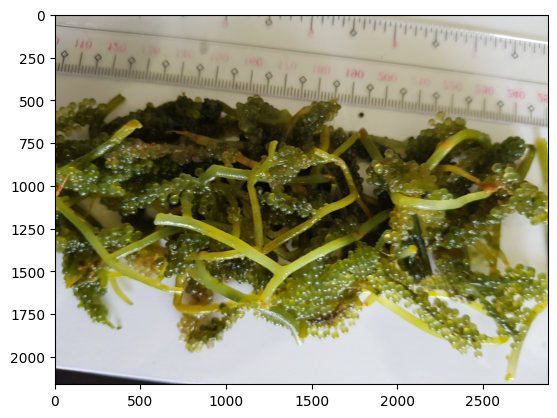

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted class: Caulerpa racemosa
Confidence: 1.00


In [98]:
import cv2
import numpy as np
import tensorflow as tf
from tkinter import Tk
from tkinter.filedialog import askopenfilename
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model(r"C:\Users\User\ImageClassification-main\models\imageclassifier.h5")  # Update with your model's path

# Define class names
class_names = ['Anadyomene plicata', 'Boodlea composita', 'Caulerpa racemosa',
               'Chlorodismis fastigiata', 'Halimeda opuntia', 'Ulva lactuca', 'Ulva reticulata']

# Function to select an image file
def select_image():
    Tk().withdraw()  # We don't want a full GUI, so keep the root window from appearing
    file_path = askopenfilename()  # Show an "Open" dialog box and return the path to the selected file
    return file_path

# Main script to load the image and predict
image_path = select_image()
if image_path:
    # Read and preprocess the image
    image = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

    resized_image = tf.image.resize(image, (256, 256))
    normalized_image = np.expand_dims(resized_image / 255.0, 0)

    # Make predictions
    prediction = model.predict(normalized_image)
    class_index = np.argmax(prediction, axis=1)[0]
    confidence = np.max(prediction)

    # Display the prediction
    print(f'Predicted class: {class_names[class_index]}')
    print(f'Confidence: {confidence:.2f}')
else:
    print("No image selected.")


# Active Learning with Human in the loop training

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_396.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_43.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_14.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_118.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Anadyomene plicata, Confidence: 0.99
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_113.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_468.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_75.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_240.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_493.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_19.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 0.96
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_372.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_164.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_365.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_31.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_439.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_161.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_129.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_69.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_270.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_437.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_185.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_41.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_182.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_64.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 0.82
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_166.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Boodlea composita, Confidence: 0.55
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_116.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_123.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_242.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_93.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_94.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_167.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_84.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_501.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_256.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_466.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_133.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_420.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_442.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_214.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_331.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 0.99
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_96.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_174.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 0.77
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_385.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_144.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_10.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_487.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_179.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_79.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_313.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_119.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_402.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_214.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_432.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_173.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_147.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_397.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 0.54
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_134.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_201.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_380.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_280.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_21.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_147.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_309.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 0.77
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_385.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_11.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_154.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_131.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_114.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_388.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_441.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_55.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_223.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_123.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_448.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_100.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_467.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 0.96
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_248.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_175.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_70.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_449.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_264.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_485.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 0.97
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_159.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_286.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_461.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_400.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_148.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_388.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_161.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_170.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_82.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_211.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_278.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_409.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_84.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_308.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 0.97
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_159.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_135.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_416.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_456.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_128.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_229.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_104.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_377.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_345.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_260.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_170.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_388.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_25.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_397.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_336.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_293.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_52.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_65.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_251.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_61.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 0.94
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_29.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_235.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_351.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_497.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_127.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_222.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_200.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_306.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_320.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_317.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_495.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_233.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_399.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted class: Anadyomene plicata, Confidence: 0.90
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_413.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_227.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_223.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_320.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_71.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_273.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_344.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_351.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_267.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_50.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_412.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 0.96
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_438.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_199.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_376.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_243.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_186.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_138.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_306.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_403.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_197.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_211.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_53.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_105.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_309.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_144.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_344.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_242.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Anadyomene plicata\Anadyomene_plicata_183.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  0


Finished 100 corrections for class: Anadyomene plicata
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_24.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_72.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_71.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_181.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_72.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_155.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_60.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_12.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_168.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_31.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_111.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_12.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_179.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_158.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_188.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_147.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_215.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_188.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_189.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_209.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_155.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_77.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_83.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_51.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_30.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_50.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_142.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_162.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_66.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_85.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_7.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_131.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_32.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_184.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_164.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 0.56
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_201.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_197.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_23.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_18.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_210.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_222.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_35.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_182.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_138.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_94.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_76.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_195.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_128.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 0.67
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_95.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_91.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_229.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_2.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_128.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_52.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_42.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_73.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_53.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_156.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_154.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_161.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_59.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_29.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_148.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_133.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_88.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_80.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_66.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_217.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 0.61
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_39.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_136.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_140.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_67.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 0.61
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_39.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 0.86
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_224.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_114.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_49.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_127.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_219.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_162.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_56.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_146.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 0.98
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_92.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_40.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_197.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_27.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_66.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_59.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_196.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_208.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_188.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_208.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_223.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_30.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_43.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 0.86
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_100.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_43.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 0.61
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_39.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_18.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_226.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_218.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_175.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_158.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_76.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Boodlea composita, Confidence: 0.91
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_87.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_190.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_47.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_73.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_123.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Caulerpa racemosa, Confidence: 0.53
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_9.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_93.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_55.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_10.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_211.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_1.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_13.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_46.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_184.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_61.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 0.99
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_106.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_194.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_168.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_93.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_141.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_82.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_118.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_178.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_61.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Caulerpa racemosa, Confidence: 0.53
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_9.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_167.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_150.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_200.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_43.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_105.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_221.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_174.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_16.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_50.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_200.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_45.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 0.93
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_64.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_216.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_79.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_86.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_185.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_193.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_184.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_222.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_27.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_174.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_42.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_75.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_180.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_192.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_187.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_3.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_111.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_31.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_68.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_172.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_120.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_195.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_164.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_23.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_150.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_79.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_145.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_171.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_79.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_45.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_57.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Caulerpa racemosa, Confidence: 0.53
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_9.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 0.89
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_132.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 0.89
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_132.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_34.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 0.53
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_15.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_124.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_210.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 0.56
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_201.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_212.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_79.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_220.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_13.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_200.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_222.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_175.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Boodlea composita, Confidence: 0.90
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_107.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_121.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_121.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_54.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_216.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_24.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_76.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_193.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_56.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_136.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_154.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_168.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_109.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_121.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_16.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_212.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_161.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_81.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_169.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_148.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_85.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_154.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_185.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_62.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_3.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_41.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_135.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_130.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_207.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_197.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_229.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_165.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_140.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Ulva reticulata, Confidence: 0.56
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_201.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_161.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 0.73
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_108.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_223.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_184.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_139.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_34.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_191.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_21.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 0.83
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_129.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_187.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_113.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_60.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_25.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_97.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_26.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_32.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 0.73
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_108.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_67.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_18.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 0.56
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_104.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_226.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_199.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 0.57
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_202.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_67.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_133.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_117.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_86.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_16.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_111.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_77.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_194.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_89.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_144.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_163.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_163.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 0.96
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_6.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_8.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_51.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Boodlea composita\Boodlea_composita_222.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  1


Finished 100 corrections for class: Boodlea composita
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_171.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_205.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_190.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_590.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_99.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_396.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 0.97
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_96.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_495.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_14.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_499.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_219.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_2.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_657.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_202.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_504.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_34.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_1.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_211.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_168.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_168.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 0.87
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_210.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 0.98
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_282.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_500.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_327.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_451.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_125.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_492.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_166.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_419.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_687.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_28.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_607.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_360.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_567.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_139.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_127.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_360.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_434.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_553.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_450.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_495.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_223.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 0.50
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_183.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_281.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_572.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_497.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_298.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_652.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_583.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_642.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_218.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_260.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_230.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_40.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_361.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_85.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 0.97
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_251.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_97.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_52.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_585.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_31.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_542.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_337.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_386.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_63.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_58.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_348.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_120.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_246.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_308.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_204.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_463.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_122.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_627.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 0.90
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_533.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_610.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_334.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_257.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_4.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_40.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_492.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_219.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_261.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_416.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_422.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_537.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_30.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_576.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_477.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_61.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_653.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_305.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_522.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_427.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_268.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 0.50
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_183.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_43.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_78.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_577.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_527.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_614.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_575.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_21.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_104.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_184.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_565.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_107.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_363.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_514.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 0.87
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_210.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_604.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_362.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_597.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_296.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_238.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_274.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_367.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_42.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_152.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 0.97
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_251.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_469.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_487.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_126.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_594.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Caulerpa racemosa, Confidence: 0.95
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_644.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_26.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_403.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_300.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_423.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_657.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_455.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_435.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_342.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_482.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_121.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Caulerpa racemosa\Caulerpa_racemosa_345.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  2


Finished 100 corrections for class: Caulerpa racemosa
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00069.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00047.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 0.89
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00074.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00059.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Caulerpa racemosa, Confidence: 0.51
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00092.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00004.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00006.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00087.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00085.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00004.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00072.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00093.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00095.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00071.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00015.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00095.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00042.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00057.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00049.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00042.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00098.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00008.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00080.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00070.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00088.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00086.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00086.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00001.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00044.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00012.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00076.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00096.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00103.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00062.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00002.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00082.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00001.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00040.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00099.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00018.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00050.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00039.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00058.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00051.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00036.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 0.99
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00031.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00033.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00089.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00025.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00089.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00085.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00067.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00017.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00069.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00086.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00082.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00067.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00056.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00025.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00022.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00050.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00022.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00003.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00004.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00095.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00080.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00006.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00005.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00044.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00062.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00021.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00040.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00050.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00104.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00020.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00045.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00071.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00104.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00013.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00053.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00037.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00072.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00051.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00067.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00081.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00096.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00016.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00017.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00093.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00008.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00032.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00042.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00008.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00102.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00087.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00080.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00049.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00029.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00058.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00044.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00086.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00067.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 0.98
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00090.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00087.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00095.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Caulerpa racemosa, Confidence: 0.51
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00092.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00030.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00086.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00098.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00093.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Anadyomene plicata, Confidence: 0.96
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00034.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00080.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00007.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00070.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00096.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00073.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00093.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00069.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00089.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00058.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00091.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00032.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00028.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00024.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00080.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00102.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 0.98
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00063.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00052.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00097.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00097.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 0.98
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00063.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00053.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00091.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00064.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 0.94
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00038.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00047.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00093.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00071.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00104.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00079.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00076.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00043.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00064.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 0.94
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00038.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00045.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00082.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00036.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00017.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00059.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 0.99
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00027.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00046.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00039.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00098.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00010.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00029.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00024.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 0.99
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00027.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 0.94
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00038.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00051.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00088.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00006.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00013.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 0.98
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00035.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00006.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00047.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00046.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00071.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00016.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00068.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00013.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00012.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00072.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00055.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00043.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00036.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00059.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 0.89
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00074.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00103.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00089.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00016.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00015.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 0.96
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00034.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00079.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 0.92
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00100.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00049.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00006.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00068.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00002.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00049.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00008.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00101.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00099.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Anadyomene plicata, Confidence: 0.96
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00034.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00068.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00021.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00101.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00093.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00052.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 0.98
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00035.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00008.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00025.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00025.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00022.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00006.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00043.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00022.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00015.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00024.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00097.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 0.99
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00026.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 0.94
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00038.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00098.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00087.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00072.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00097.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00060.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00085.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00102.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00058.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00105.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00095.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00039.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 0.98
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00063.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00049.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00065.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00065.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00091.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00013.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00005.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 0.92
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00100.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00059.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00056.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00004.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00095.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00044.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00077.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00060.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00030.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00047.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00019.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00105.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00085.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00072.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 0.98
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00090.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00072.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00022.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00014.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00006.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00101.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00086.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00039.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00024.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00053.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00055.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00033.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00068.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00019.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00096.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00015.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00024.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00001.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00048.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00067.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00101.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Chlorodismis fastigiata\Chlorodismis_fastigiata_00068.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  3


Finished 100 corrections for class: Chlorodismis fastigiata
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_9.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_35.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_88.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_93.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_72.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_12.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_32.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_30.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_99.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_22.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_108.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_29.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_20.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_89.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_20.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_28.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_93.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_78.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_83.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_3.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_113.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 0.99
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_112.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_96.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_73.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_27.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_13.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_9.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_23.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_91.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_51.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_11.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_45.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_97.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_85.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_63.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 0.90
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_76.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_96.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_107.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_72.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_44.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_101.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_77.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_97.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_102.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_23.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_101.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_54.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_85.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_2.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_103.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_82.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_107.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_35.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_100.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_23.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_105.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_32.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_3.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_60.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_90.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_108.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_68.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_73.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_8.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Ulva lactuca, Confidence: 0.70
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_116.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_96.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_88.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_106.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_66.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_115.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_102.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_111.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_71.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_89.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_15.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_33.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_58.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_79.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_15.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_48.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_14.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_91.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_20.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_69.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_13.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_84.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_93.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_89.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_107.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_16.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_98.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_7.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_113.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_37.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_21.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_2.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_94.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_111.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_88.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_51.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_36.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_91.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_113.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_91.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_2.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 0.99
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_74.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_81.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_89.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_26.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_28.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_37.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_86.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_52.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_67.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_46.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_5.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_101.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_11.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 0.99
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_112.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_52.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_77.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_61.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_111.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_10.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_99.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_47.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_3.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_4.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_97.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_86.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_1.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_2.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_9.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_15.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 0.90
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_76.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_108.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_106.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_48.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_38.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 0.99
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_92.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_114.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_18.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_90.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_10.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_24.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_86.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_38.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Caulerpa racemosa, Confidence: 0.84
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_59.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_69.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_46.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_109.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_103.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_98.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_3.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 0.90
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_87.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_17.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_104.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_66.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_98.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_54.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_80.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_56.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_63.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_42.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_20.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_62.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_109.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_32.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_90.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_100.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_57.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_54.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_72.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_37.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_35.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_39.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_71.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_19.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_61.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_44.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_9.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_19.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_50.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_41.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_54.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 0.90
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_76.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_18.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_110.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_75.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_83.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_64.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_48.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_80.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_36.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_88.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 0.90
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_87.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_16.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_53.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_58.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_4.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_93.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_72.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_97.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_24.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_43.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_64.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_8.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_62.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_39.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_25.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_84.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_75.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_99.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_103.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_89.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_81.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_4.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_14.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_95.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_27.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 0.99
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_112.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_64.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_56.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_54.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_108.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_28.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_34.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_13.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_33.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_38.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_109.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_81.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_85.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_37.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_49.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_84.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_4.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_51.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_98.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_38.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_35.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_28.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_62.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_109.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_38.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_33.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_9.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_65.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 0.99
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_92.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_37.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_43.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_77.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_101.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_7.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_57.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_2.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_75.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_94.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_51.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_26.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_48.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_15.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_26.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 0.70
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_116.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 0.90
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_76.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_83.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_111.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_115.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_28.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_2.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_51.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_47.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_62.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_14.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_48.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_115.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_14.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_8.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_57.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_61.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_51.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_107.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_107.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_29.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_28.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_102.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_44.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_42.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_72.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_63.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_97.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_43.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_11.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_28.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_90.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_13.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_8.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_32.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_37.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_64.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_15.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_46.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_13.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_109.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_82.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_34.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_79.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_2.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_35.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_29.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_5.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_7.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_5.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_22.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_100.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_81.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_84.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_49.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_25.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_54.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_53.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_14.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_77.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_17.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_30.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_62.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_55.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_86.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_96.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_26.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_52.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_26.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_93.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_78.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_41.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_99.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_84.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 0.90
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_76.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_94.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_29.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_29.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_63.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_78.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_2.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_91.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_36.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_98.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_113.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_25.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_44.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_43.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_55.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_1.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_23.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_37.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_97.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_98.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_1.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_102.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Halimeda opuntia, Confidence: 0.90
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_76.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Halimeda opuntia\Halimeda_opuntia_99.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  4


Finished 100 corrections for class: Halimeda opuntia
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_410.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_486.jpg


Is this correct? (y/n):  5


Invalid input! Please enter 'y' for yes or 'n' for no.


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_9.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_267.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_455.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_9.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_308.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_341.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_261.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_384.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_437.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_185.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_99.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_278.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_147.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_465.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_235.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_161.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_177.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_312.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_127.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_419.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_328.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_161.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_105.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_376.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Boodlea composita, Confidence: 0.91
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_246.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_478.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_452.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_216.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_94.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_429.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_107.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_56.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_463.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_375.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_27.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_483.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_242.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_146.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_80.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_216.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_1.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_138.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_318.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_455.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_94.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_112.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_122.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_365.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_277.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_179.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_449.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_400.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_38.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_363.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_475.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_414.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_482.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_227.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_277.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_264.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_241.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_115.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_479.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_158.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_280.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_333.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_107.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_339.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_333.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_37.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_288.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_182.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_196.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_204.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_165.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_457.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_181.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_456.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_142.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_111.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_99.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_30.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_480.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_15.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_476.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_243.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_99.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_153.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_438.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_315.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_144.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_473.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_49.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_94.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_190.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_72.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_301.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_167.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_283.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_436.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_170.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_456.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_217.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_101.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_310.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_198.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_492.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_155.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_51.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_396.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_254.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_57.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_304.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_366.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_426.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_248.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_165.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_281.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_485.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_493.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_107.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_239.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_402.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_483.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_112.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_4.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_402.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_191.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_114.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_84.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_354.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_420.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_239.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_57.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_199.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_31.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Predicted class: Ulva reticulata, Confidence: 0.61
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_19.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_23.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_56.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_286.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_279.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_57.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_490.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_47.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_2.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_162.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_323.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_47.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_198.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_245.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_281.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_407.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_459.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_94.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_238.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_146.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_225.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_60.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_436.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_428.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_162.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_488.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_224.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_178.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_33.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_40.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_375.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_477.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_157.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_214.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_134.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_429.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_29.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_481.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_16.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_324.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_176.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_369.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_364.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_117.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted class: Halimeda opuntia, Confidence: 0.74
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_13.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_216.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_438.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_233.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva lactuca\Ulva_lactuca_167.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  5


Finished 100 corrections for class: Ulva lactuca
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_121.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_50.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 0.84
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_138.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 0.70
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_7.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_69.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 0.84
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_138.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_111.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_10.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_48.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_117.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_4.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_124.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_47.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_77.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_93.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_81.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_98.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_77.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_98.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_61.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Ulva reticulata, Confidence: 0.99
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_116.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_54.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 0.76
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_6.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_87.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_135.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_57.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_115.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_139.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_70.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_15.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_133.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 0.76
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_6.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_123.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_14.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_118.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_113.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_1.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_43.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_78.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 0.70
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_7.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Boodlea composita, Confidence: 0.99
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_137.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_131.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_9.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 0.84
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_26.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_48.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_57.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_16.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_28.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Caulerpa racemosa, Confidence: 0.99
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_92.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_5.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_61.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_12.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_140.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_11.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_54.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_139.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_93.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_91.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_90.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_101.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_73.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_110.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_20.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_93.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_87.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_125.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_125.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_13.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_120.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_14.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_132.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_117.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_45.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_75.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_9.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Boodlea composita, Confidence: 0.99
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_137.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_67.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_141.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_136.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_121.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_68.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_32.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_87.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_37.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_102.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_54.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_66.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_113.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_76.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_141.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_140.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_133.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_121.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_48.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_67.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_72.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_94.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_124.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_75.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_72.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_120.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 0.98
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_106.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_22.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_27.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_79.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_118.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_31.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_123.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_56.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_63.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_37.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_83.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_67.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_58.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_108.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_50.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_57.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_121.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_49.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_18.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_100.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_45.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_28.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_88.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 0.80
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_33.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_56.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_39.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_110.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_112.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_10.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_71.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_77.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 0.70
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_7.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_30.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Caulerpa racemosa, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_136.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_123.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_65.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Ulva reticulata, Confidence: 0.84
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_138.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 0.99
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_116.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Boodlea composita, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_9.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_11.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_99.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Chlorodismis fastigiata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_117.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_3.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_69.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_12.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_83.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_75.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_31.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_89.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_67.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_4.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_36.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Halimeda opuntia, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_104.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_30.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_99.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_89.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_49.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Anadyomene plicata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_57.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_125.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_64.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_20.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Ulva reticulata, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_88.jpg


Is this correct? (y/n):  Y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_140.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Ulva lactuca, Confidence: 1.00
Image path: D:\Seaweeds dataset\wild\val\Ulva reticulata\Ulva_reticulata_25.jpg


Is this correct? (y/n):  n
Enter the correct class (0-6):  6


Finished 100 corrections for class: Ulva reticulata
Epoch 1/500
233/233 ━━━━━━━━━━━━━━━━━━━━ 18s 68ms/step - accuracy: 0.8991 - loss: 13.8340
Epoch 2/500
233/233 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - accuracy: 0.9008 - loss: 13.5953
Epoch 3/500
233/233 ━━━━━━━━━━━━━━━━━━━━ 15s 62ms/step - accuracy: 0.9060 - loss: 11.4305
Epoch 4/500
233/233 ━━━━━━━━━━━━━━━━━━━━ 15s 63ms/step - accuracy: 0.9052 - loss: 11.6156
Epoch 5/500
233/233 ━━━━━━━━━━━━━━━━━━━━ 15s 62ms/step - accuracy: 0.9049 - loss: 10.9286
Epoch 6/500
233/233 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - accuracy: 0.9152 - loss: 9.9561
Epoch 7/500
233/233 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - accuracy: 0.9436 - loss: 4.8044
Epoch 23/500
233/233 ━━━━━━━━━━━━━━━━━━━━ 15s 63ms/step - accuracy: 0.9484 - loss: 5.0224
Epoch 24/500
233/233 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - accuracy: 0.9492 - loss: 5.0177
Epoch 25/500
233/233 ━━━━━━━━━━━━━━━━━━━━ 15s 62ms/step - accuracy: 0.9471 - loss: 5.4462
Epoch 26/500
233/233 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms

Model has been retrained and saved as 01greenseaweed.h5


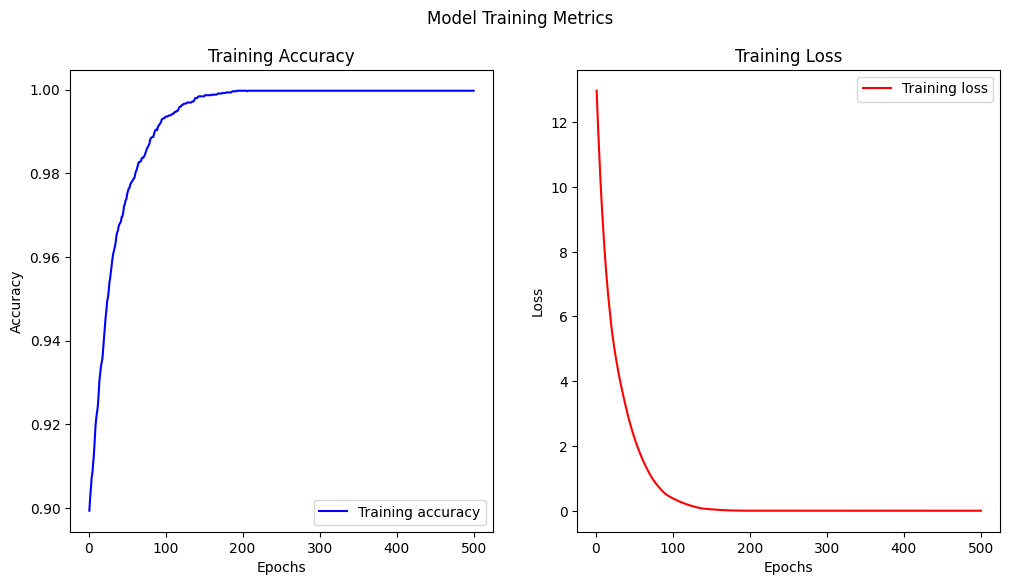

In [44]:
import os
import numpy as np
import random
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt

# Load the pre-trained model
model = load_model(r"C:\Users\User\ImageClassification-main\models\imageclassifier.h5")

# Freeze all layers except the last two (fine-tuning only the final dense layers)
for layer in model.layers[:-2]:  # Freeze all layers except the last two (dense and output)
    layer.trainable = False

# Compile the model with a lower learning rate for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Define the path to your validation set
base_dir = r"D:\Seaweeds dataset\wild\val"
classes = ['Anadyomene plicata', 'Boodlea composita', 'Caulerpa racemosa', 
           'Chlorodismis fastigiata', 'Halimeda opuntia', 'Ulva lactuca', 'Ulva reticulata']
feedback_data = []  # To store incorrectly classified images and their correct labels

# Set the number of corrections needed per class
num_corrections_needed = 100
num_corrections = {cls: 0 for cls in classes}  # Initialize correction counts per class

# Set image size to match the original model's input (256x256 as per model structure)
img_height, img_width = 256, 256

def classify_image(img_path, model):
    """Classifies the image and returns predicted class and confidence."""
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img) / 255.0  # Normalize to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)
    confidence = np.max(predictions)
    return predicted_class, confidence

def handle_feedback(img_path, predicted_class, confidence):
    """Displays classification results and gets feedback from the user."""
    print(f"Predicted class: {classes[predicted_class]}, Confidence: {confidence:.2f}")
    print(f"Image path: {img_path}")

    # Input validation for 'y' or 'n'
    while True:
        correct = input("Is this correct? (y/n): ").strip().lower()
        if correct in ['y', 'n']:
            break
        else:
            print("Invalid input! Please enter 'y' for yes or 'n' for no.")
    
    if correct == 'n':
        # Input validation for entering the correct class (0-6)
        while True:
            true_class = input(f"Enter the correct class (0-{len(classes)-1}): ")
            if true_class.isdigit() and 0 <= int(true_class) <= len(classes) - 1:
                return int(true_class), False
            else:
                print(f"Invalid input! Please enter a number between 0 and {len(classes)-1}.")
    
    return predicted_class, True

def store_feedback(img_path, correct_class):
    """Stores the feedback data for later retraining."""
    feedback_data.append((img_path, correct_class))

def plot_learning_curve(history):
    """Plots the learning curves of loss and accuracy over epochs."""
    # Extract accuracy and loss from the history object
    acc = history.history['accuracy']
    loss = history.history['loss']
    epochs = range(1, len(acc) + 1)

    # Plot accuracy
    plt.figure(figsize=(12, 6))
    
    # Subplot 1: Training Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.title('Training Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Subplot 2: Training Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.title('Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.suptitle('Model Training Metrics')
    plt.show()

def retrain_model(feedback_data, model, original_data_dir):
    """Retrains the model using both original and feedback data, saves it, and plots the learning curve."""
    new_images = []
    new_labels = []
    
    # Load the original training data to combine with corrections
    original_images = []
    original_labels = []
    
    for class_dir in classes:
        class_idx = classes.index(class_dir)
        class_folder = os.path.join(original_data_dir, class_dir)
        for img_name in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_name)
            img = image.load_img(img_path, target_size=(img_height, img_width))
            img_array = image.img_to_array(img) / 255.0
            original_images.append(img_array)
            original_labels.append(class_idx)
    
    # Load feedback (correction) data
    for img_path, correct_class in feedback_data:
        img = image.load_img(img_path, target_size=(img_height, img_width))
        img_array = image.img_to_array(img) / 255.0  # Normalize to [0, 1]
        new_images.append(img_array)
        new_labels.append(correct_class)
    
    # Combine original data and new corrections
    combined_images = np.array(original_images + new_images)
    combined_labels = np.array(original_labels + new_labels)
    
    # Convert labels to categorical (one-hot encoded)
    combined_labels_categorical = to_categorical(combined_labels, num_classes=len(classes))
    
    # Fine-tune the model on the combined data
    history = model.fit(combined_images, combined_labels_categorical, epochs=500, verbose=1)  # Adjust epochs as needed
    
    # Save the updated model
    model.save(r"C:\Users\User\ImageClassification-main\models\01greenseaweed.h5")
    print("Model has been retrained and saved as 01greenseaweed.h5")

    # Plot the learning curves
    plot_learning_curve(history)

# Classification and feedback loop for each class
for class_dir in classes:
    while num_corrections[class_dir] < num_corrections_needed:
        # Pick a random image from the current class
        img_name = random.choice(os.listdir(os.path.join(base_dir, class_dir)))
        img_path = os.path.join(base_dir, class_dir, img_name)
        
        # Classify the image using the model
        predicted_class, confidence = classify_image(img_path, model)
        
        # Handle user feedback
        user_class, correct = handle_feedback(img_path, predicted_class, confidence)
        
        # If the classification was wrong, store the feedback
        if not correct:
            store_feedback(img_path, user_class)
            num_corrections[class_dir] += 1  # Increment correction count for the specific class
        
    print(f"Finished 100 corrections for class: {class_dir}")

# Retrain the model after collecting corrections
original_data_dir = r"C:\Users\User\ImageClassification-main\data"  # Path to original training data
if feedback_data:
    retrain_model(feedback_data, model, original_data_dir)
else:
    print("No corrections were made, so no retraining is needed.")


# plot the metrics and confusion matrix 

Found 2167 images belonging to 7 classes.


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


68/68 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step

Classification Report:
                         precision    recall  f1-score   support

     Anadyomene plicata       1.00      1.00      1.00       505
      Boodlea composita       1.00      1.00      1.00       100
      Caulerpa racemosa       1.00      1.00      1.00       705
Chlorodismis fastigiata       1.00      1.00      1.00       105
       Halimeda opuntia       1.00      1.00      1.00       116
           Ulva lactuca       1.00      1.00      1.00       495
        Ulva reticulata       1.00      1.00      1.00       141

               accuracy                           1.00      2167
              macro avg       1.00      1.00      1.00      2167
           weighted avg       1.00      1.00      1.00      2167

Accuracy: 100.00%


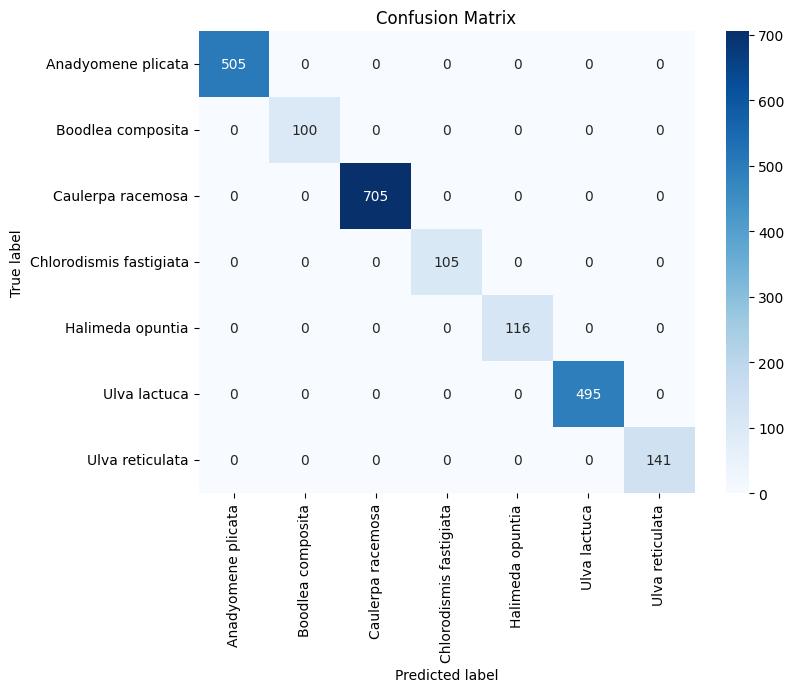

In [45]:
import os
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
base_test_dir = r"D:\Seaweeds dataset\wild\test"
model_path = r"C:\Users\User\ImageClassification-main\models\01greenseaweed.h5"  # Path to your retrained model

# Classes (replace these with your actual class names)
classes = ['Anadyomene plicata', 'Boodlea composita', 'Caulerpa racemosa', 
           'Chlorodismis fastigiata', 'Halimeda opuntia', 'Ulva lactuca', 'Ulva reticulata']

# Load the retrained model
model = tf.keras.models.load_model(model_path)

# Set image size (same as training)
img_height, img_width = 256, 256  # Model expects (256, 256, 3)
batch_size = 32

# Data generator for the test set (only rescaling)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load the test data
test_generator = test_datagen.flow_from_directory(
    base_test_dir,
    target_size=(img_height, img_width),  # Match model's input size
    batch_size=batch_size,
    class_mode='categorical',  # Use categorical for multi-class classification
    shuffle=False
)

# Predict the classes for the test set
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes

# Generate a classification report
print("\nClassification Report:")
report = classification_report(y_true, y_pred, target_names=classes)
print(report)

# Print accuracy score
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    Plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(8, 6))
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        fmt = '.2f'
    else:
        fmt = 'd'
    sns.heatmap(cm, annot=True, fmt=fmt, cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Plot confusion matrix
plot_confusion_matrix(cm, classes=classes)

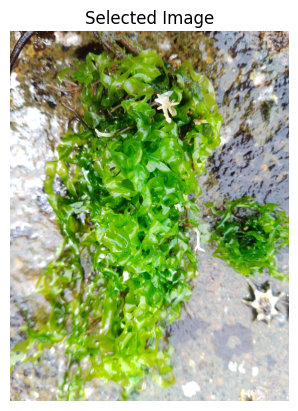

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predicted class: Ulva reticulata
Confidence: 1.00


In [128]:
import cv2
import numpy as np
import tensorflow as tf
from tkinter import Tk
from tkinter.filedialog import askopenfilename
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model(r"C:\Users\User\ImageClassification-main\models\01greenseaweed.h5")  # Update with your model's path

# Define class names
class_names = ['Anadyomene plicata', 'Boodlea composita', 'Caulerpa racemosa',
               'Chlorodismis fastigiata', 'Halimeda opuntia', 'Ulva lactuca', 'Ulva reticulata']

# Function to select an image file
def select_image():
    Tk().withdraw()  # Hide the root window
    file_path = askopenfilename()  # Open file dialog and get file path
    return file_path

# Main script to load the image and predict
image_path = select_image()
if image_path:
    # Read the image using OpenCV
    image = cv2.imread(image_path)
    
    # Display the selected image using Matplotlib
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Selected Image")
    plt.axis('off')  # Hide axis
    plt.show()

    # Preprocess the image for the model
    input_height, input_width = 256, 256  # Model's expected input size
    resized_image = cv2.resize(image, (input_width, input_height))  # Resize the image
    normalized_image = resized_image / 255.0  # Normalize pixel values
    expanded_image = np.expand_dims(normalized_image, axis=0)  # Add batch dimension (1, 256, 256, 3)

    # Make predictions using the model
    prediction = model.predict(expanded_image)
    class_index = np.argmax(prediction, axis=1)[0]  # Get the predicted class index
    confidence = np.max(prediction)  # Get the confidence score for the prediction

    # Display the prediction and confidence
    print(f'Predicted class: {class_names[class_index]}')
    print(f'Confidence: {confidence:.2f}')
else:
    print("No image selected.")


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model(r"C:\Users\User\ImageClassification-main\models\01greenseaweed.h5")  # Update with your model's path

# Define class names
class_names = ['Anadyomene plicata', 'Boodlea composita', 'Caulerpa racemosa',
               'Chlorodismis fastigiata', 'Halimeda opuntia', 'Ulva lactuca', 'Ulva reticulata']

# Open the camera
cap = cv2.VideoCapture(0)

# Set the width and height of the camera
cap.set(3, 640)  # Width
cap.set(4, 480)  # Height

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Preprocess the frame for prediction
    resized_frame = tf.image.resize(frame, (256, 256))
    normalized_frame = np.expand_dims(resized_frame / 255.0, 0)

    # Prediction
    prediction = model.predict(normalized_frame)
    class_index = np.argmax(prediction, axis=1)[0]
    confidence = np.max(prediction)

    # Display the prediction on the frame
    cv2.putText(frame, f'Class: {class_names[class_index]}', (10, 30), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    
    cv2.putText(frame, f'Confidence: {confidence:.2f}', (10, 60), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

    # Show the frame
    cv2.imshow('Camera', frame)

    # Break the loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━